**MNIST_NN_XAVIER**

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

In [6]:
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)
relu = torch.nn.ReLU()

In [7]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.0215, -0.0894,  0.0598,  ...,  0.0200,  0.0203,  0.1212],
        [ 0.0078,  0.1378,  0.0920,  ...,  0.0975,  0.1458, -0.0302],
        [ 0.1270, -0.1296,  0.1049,  ...,  0.0124,  0.1173, -0.0901],
        ...,
        [ 0.0661, -0.1025,  0.1437,  ...,  0.0784,  0.0977, -0.0396],
        [ 0.0430, -0.1274, -0.0134,  ..., -0.0582,  0.1201,  0.1479],
        [-0.1433,  0.0200, -0.0568,  ...,  0.0787,  0.0428, -0.0036]],
       requires_grad=True)

In [8]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [9]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [10]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print("Epoch:", "%04d," % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

print("Learning finished")

Epoch: 0001, cost = 0.246910840
Epoch: 0002, cost = 0.092965133
Epoch: 0003, cost = 0.061561264
Epoch: 0004, cost = 0.043800946
Epoch: 0005, cost = 0.033017766
Epoch: 0006, cost = 0.026761016
Epoch: 0007, cost = 0.021199923
Epoch: 0008, cost = 0.017867779
Epoch: 0009, cost = 0.015077273
Epoch: 0010, cost = 0.014713685
Epoch: 0011, cost = 0.012480275
Epoch: 0012, cost = 0.010521241
Epoch: 0013, cost = 0.014525975
Epoch: 0014, cost = 0.010190233
Epoch: 0015, cost = 0.006412634
Learning finished


**MNIST_NN_DEEP**

In [11]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [13]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [14]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download = True)

In [15]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

In [17]:
linear1 = torch.nn.Linear(784, 512, bias = True)
linear2 = torch.nn.Linear(512, 512, bias = True)
linear3 = torch.nn.Linear(512, 512, bias = True)
linear4 = torch.nn.Linear(512, 512, bias = True)
linear5 = torch.nn.Linear(512, 10, bias = True)
relu = torch.nn.ReLU()

In [19]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0899,  0.0344,  0.0324,  ..., -0.1041, -0.0016,  0.0298],
        [-0.0162, -0.0204, -0.0906,  ..., -0.0675,  0.0825, -0.0610],
        [ 0.0777, -0.0388, -0.0624,  ..., -0.0477,  0.0532, -0.0463],
        ...,
        [ 0.0552, -0.0701, -0.0213,  ..., -0.0114,  0.0745, -0.0336],
        [ 0.0348,  0.0528, -0.1002,  ..., -0.0134, -0.0921,  0.0499],
        [ 0.0743, -0.0307,  0.0216,  ...,  0.0516, -0.0265,  0.0195]],
       requires_grad=True)

In [20]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [21]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [22]:
total_batch = len(data_loader)

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch

    print("Epoch:", "%04d," % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

print("Learning finished")

Epoch: 0001, cost = 0.282756597
Epoch: 0002, cost = 0.088381521
Epoch: 0003, cost = 0.055571832
Epoch: 0004, cost = 0.040012129
Epoch: 0005, cost = 0.030692693
Epoch: 0006, cost = 0.023347866
Epoch: 0007, cost = 0.019123215
Epoch: 0008, cost = 0.019916331
Epoch: 0009, cost = 0.014060756
Epoch: 0010, cost = 0.015583001
Epoch: 0011, cost = 0.012432382
Epoch: 0012, cost = 0.010038194
Epoch: 0013, cost = 0.009909199
Epoch: 0014, cost = 0.009562260
Epoch: 0015, cost = 0.011817674
Learning finished


In [24]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print("Label:", Y_single_data.item())

    single_prediction = model(X_single_data)

    print("Prediction:", torch.argmax(single_prediction, 1).item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.982699990272522
Label: 5
Prediction: 5


**MNIST_NN_DROPOUT**

In [25]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [27]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100
drop_prob = 0.3

In [28]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download = True)

In [29]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

In [32]:
linear1 = torch.nn.Linear(784, 512, bias = True)
linear2 = torch.nn.Linear(512, 512, bias = True)
linear3 = torch.nn.Linear(512, 512, bias = True)
linear4 = torch.nn.Linear(512, 512, bias = True)
linear5 = torch.nn.Linear(512, 10, bias = True)

relu = torch.nn.ReLU()

dropout = torch.nn.Dropout(p = drop_prob)

In [33]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0145,  0.0016,  0.0618,  ...,  0.0225,  0.0310, -0.0521],
        [ 0.0082,  0.0659, -0.0117,  ...,  0.0425,  0.0424,  0.0460],
        [ 0.0389, -0.0239,  0.1033,  ..., -0.0196, -0.0008, -0.0841],
        ...,
        [-0.0195,  0.0322,  0.0547,  ..., -0.0733, -0.0486,  0.0937],
        [ 0.0488, -0.0496, -0.0799,  ...,  0.0822,  0.0339,  0.0458],
        [-0.0473, -0.0978,  0.0112,  ...,  0.1009,  0.0862, -0.0419]],
       requires_grad=True)

In [34]:
model = torch.nn.Sequential(linear1, relu, dropout, linear2, relu, dropout, linear3, relu, dropout, linear4, relu, dropout, linear5).to(device)

In [35]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [39]:
total_batch = len(data_loader)
model.train()
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch

    print("Epoch:", "%04d," % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

print("Learning finished")

Epoch: 0001, cost = 0.307288647
Epoch: 0002, cost = 0.143177822
Epoch: 0003, cost = 0.112622671
Epoch: 0004, cost = 0.091869012
Epoch: 0005, cost = 0.084570028
Epoch: 0006, cost = 0.073754489
Epoch: 0007, cost = 0.068883933
Epoch: 0008, cost = 0.062809981
Epoch: 0009, cost = 0.061298478
Epoch: 0010, cost = 0.053408206
Epoch: 0011, cost = 0.050474454
Epoch: 0012, cost = 0.049549483
Epoch: 0013, cost = 0.045433026
Epoch: 0014, cost = 0.046903763
Epoch: 0015, cost = 0.045777209
Learning finished


In [42]:
with torch.no_grad():
    model.eval()

    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()

    print("Accuracy:", accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print("Label:", Y_single_data.item())

    single_prediction = model(X_single_data)

    print("Prediction:", torch.argmax(single_prediction, 1).item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9771999716758728
Label: 7
Prediction: 7


**MNIST_BATCHNORM**

In [43]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(1)
if device == "cuda":
    torch.cuda.manual_seed_all(1)

In [45]:
learning_rate = 0.001
training_epochs = 10
batch_size = 32

In [46]:
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = transforms.ToTensor(), download = True)

In [47]:
train_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last = True)

test_loader = torch.utils.data.DataLoader(dataset = mnist_test, batch_size = batch_size, shuffle = False, drop_last = True)

In [50]:
linear1 = torch.nn.Linear(784, 32, bias = True)
linear2 = torch.nn.Linear(32, 32, bias = True)
linear3 = torch.nn.Linear(32, 10, bias = True)

relu = torch.nn.ReLU()

bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias = True)
nn_linear2 = torch.nn.Linear(32, 32, bias = True)
nn_linear3 = torch.nn.Linear(32, 10, bias = True)

In [51]:
bn_model = torch.nn.Sequential(linear1, bn1, relu, linear2, bn2, relu, linear3).to(device)

nn_model = torch.nn.Sequential(nn_linear1, relu, nn_linear2, relu, nn_linear3).to(device)

In [52]:
criterion = torch.nn.CrossEntropyLoss().to(device)

bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr = learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr = learning_rate)

In [53]:
train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)

for epoch in range(training_epochs):
    bn_model.train()

    for X, Y in train_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()


        nn_optimizer.zero_grad()
        nn_prediction = nn_model(X)
        nn_loss = criterion(nn_prediction, Y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():
        bn_model.eval()
        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0

        for i, (X, Y) in enumerate(train_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / train_total_batch, nn_loss / train_total_batch, bn_acc / train_total_batch, nn_acc / train_total_batch

        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])

        print("[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)"%((epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()))

        bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0

        for i, (X, Y) in enumerate(test_loader):
            X = X.view(-1, 28 * 28).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss, bn_acc, nn_acc = bn_loss / test_total_batch, nn_loss / test_total_batch, bn_acc / test_total_batch, nn_acc / test_total_batch

        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print("[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)"%((epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()), "\n")

print("Learning finished")

[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.13869(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.22216(nn_acc:0.94)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.14944(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.22564(nn_acc:0.94) 

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.10144(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.14599(nn_acc:0.96)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.12264(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.15700(nn_acc:0.95) 

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.08709(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.12343(nn_acc:0.96)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.11022(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.14185(nn_acc:0.96) 

[Epoch 4-TRAIN] Batchnorm Loss(Acc): bn_loss:0.07358(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.10577(nn_acc:0.97)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.10566(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.13533(nn_acc:0.96) 

[Epoch 5-TRAIN] 

In [54]:
import matplotlib.pylab as plt

In [55]:
def plot_compare(loss_list: list, ylim = None, title = None) -> None:

    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize = (15, 10))
    plt.plot(bn, label = "With BN")
    plt.plot(nn, label = "Without BN")
    
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)

    plt.legend()
    plt.grid("on")
    plt.show()

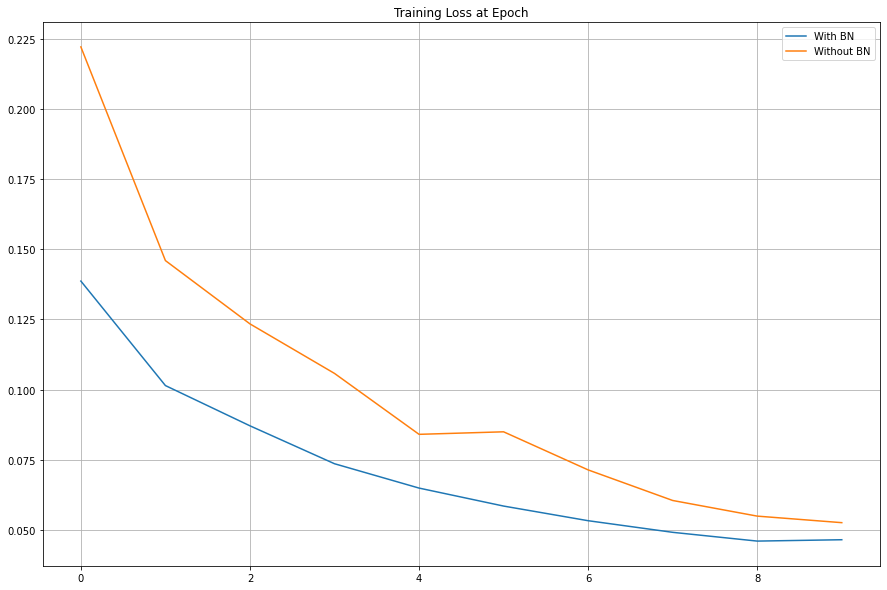

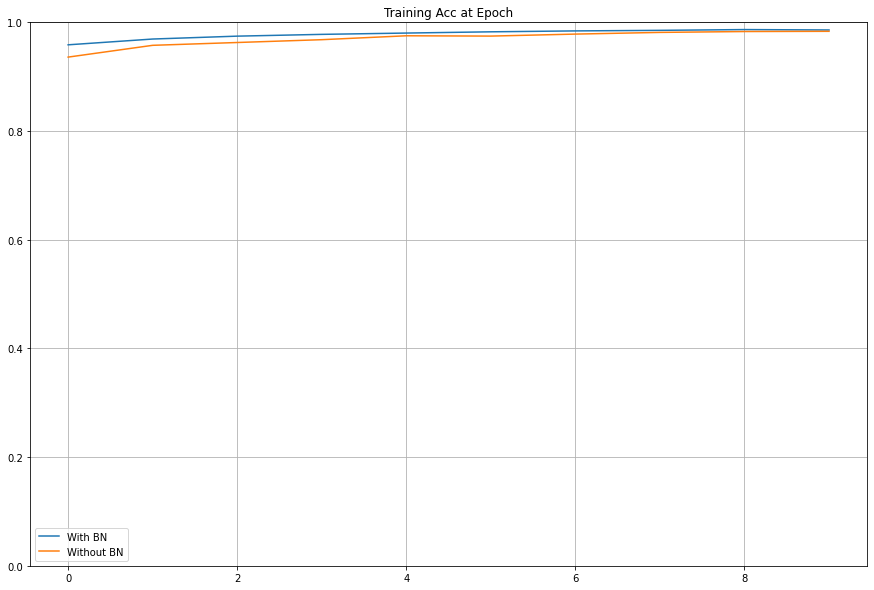

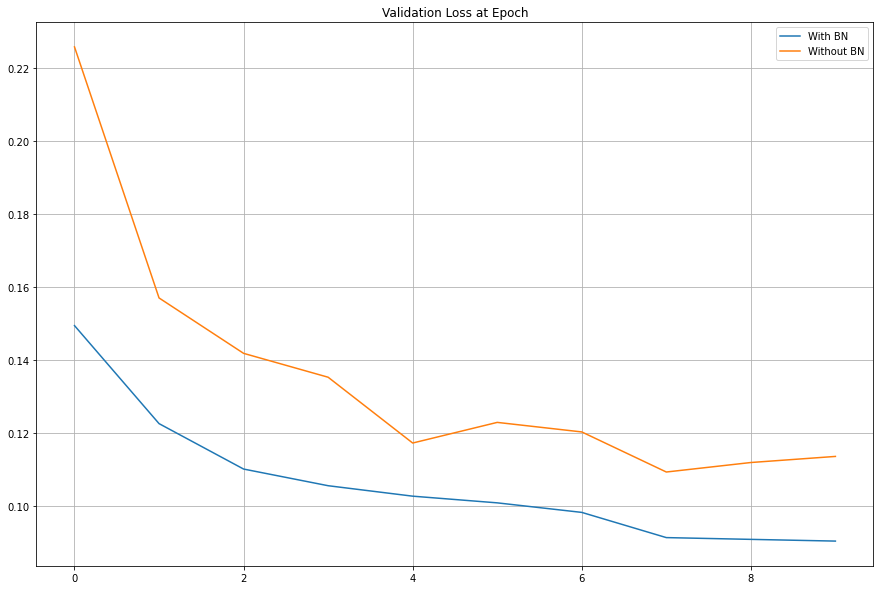

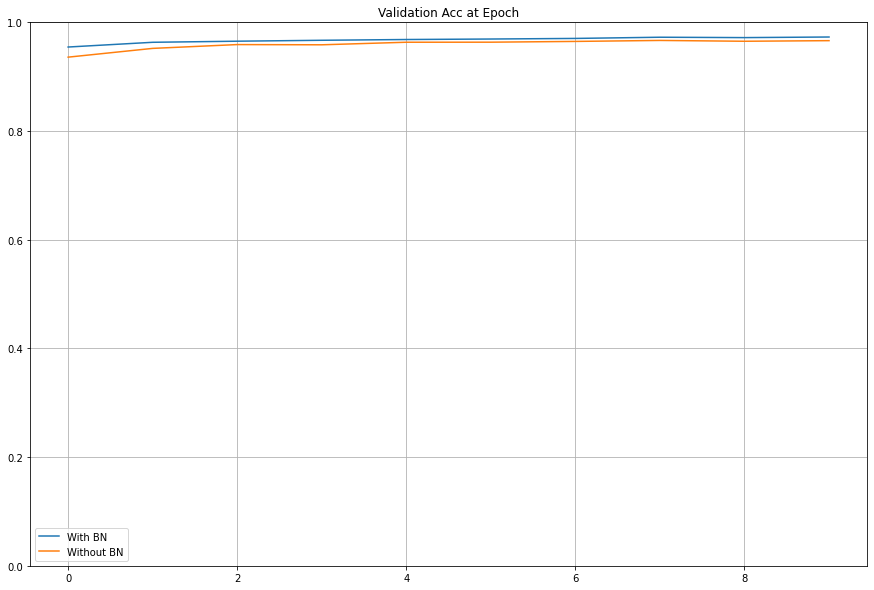

In [56]:
plot_compare(train_losses, title = "Training Loss at Epoch")
plot_compare(train_accs, [0, 1.0], title = "Training Acc at Epoch")
plot_compare(valid_losses, title = "Validation Loss at Epoch")
plot_compare(valid_accs, [0, 1.0], title = "Validation Acc at Epoch")